### Project Name -  " Laptop Price Prediction " 

# 1. Problem Statement

### # Libraries Required in whole Project

In [1]:
import numpy as np  
import pandas as pd 

"Warnings"
import warnings
warnings.filterwarnings("ignore")

"Visualisation"
import seaborn as sns
import matplotlib.pyplot as plt

"Loading Data"
import pickle
import json

"Scalling"
from sklearn.preprocessing import StandardScaler, MinMaxScaler

"VIF"
from statsmodels.stats.outliers_influence import variance_inflation_factor


"Split Data"
from sklearn.model_selection import train_test_split

"ML - Algorithm"
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

"Model Evalution"
from sklearn.metrics import r2_score ,mean_absolute_error

"Hyperparameter Tunning"
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



# 2. Data Gathering

Kaggle Link to Download this csv file   :___  [Link csv_link](https://www.kaggle.com/datasets/saadmo/laptop-price) 

In [2]:
"CSV file >> DF"

df = pd.read_csv("Laptop_Price.csv",index_col=["Unnamed: 0"])
df.sample(5)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ssd,hdd,os,os_bit,graphic_card_gb,Touchscreen,msoffice,Price
213,ASUS,Intel,Core i5,11th,8 GB,256 GB,0 GB,Windows,64-bit,0 GB,No,No,49800
10,acer,AMD,Ryzen 5,10th,4 GB,0 GB,512 GB,Windows,32-bit,6 GB,No,No,93700
469,DELL,Intel,Core i5,11th,8 GB,256 GB,1024 GB,Windows,64-bit,2 GB,No,No,67490
129,HP,Intel,Core i3,11th,8 GB,512 GB,0 GB,Windows,64-bit,0 GB,Yes,Yes,55490
615,APPLE,M1,M1,10th,4 GB,512 GB,0 GB,Mac,64-bit,0 GB,No,No,124990


## Data Understandig

In [3]:
df.sample(5)            # How data Looks
df.isna().sum()         # 18 NaN
df.T.duplicated().sum() # col
df.duplicated().sum()   # 46 duplicate rows 
df.shape  

(823, 13)

In [4]:
# Remove duplicate Rows

df = df.drop_duplicates()
df.shape

(777, 13)

# 3. EDA ( Exploratory Data Analysis )

#### Relation Of Independent col with Target col 

<Axes: xlabel='ram_gb'>

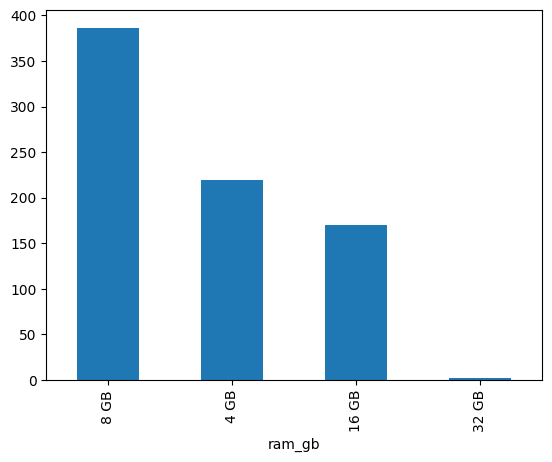

In [6]:
df["ram_gb"].value_counts().plot(kind="bar")

<Axes: xlabel='os_bit'>

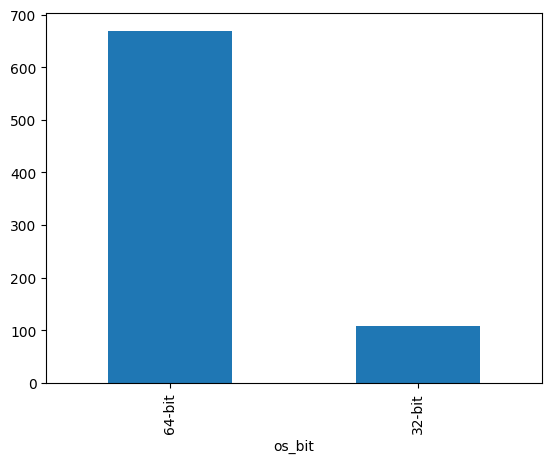

In [21]:
# df["graphic_card_gb"].value_counts().plot(kind="bar")
df["os_bit"].value_counts().plot(kind="bar")

<Axes: xlabel='brand', ylabel='Price'>

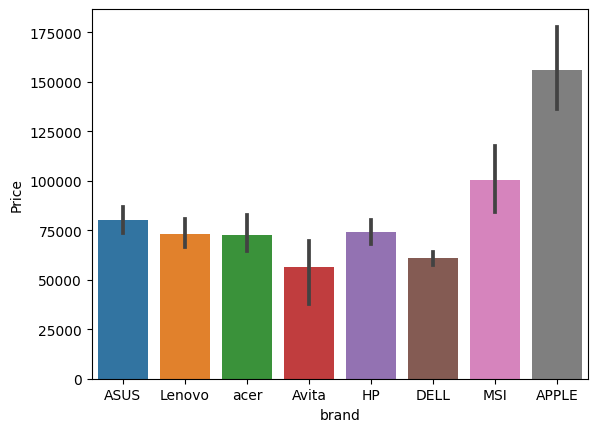

In [5]:
sns.barplot(x = df["brand"] ,y =df["Price"])

<Axes: xlabel='os', ylabel='Price'>

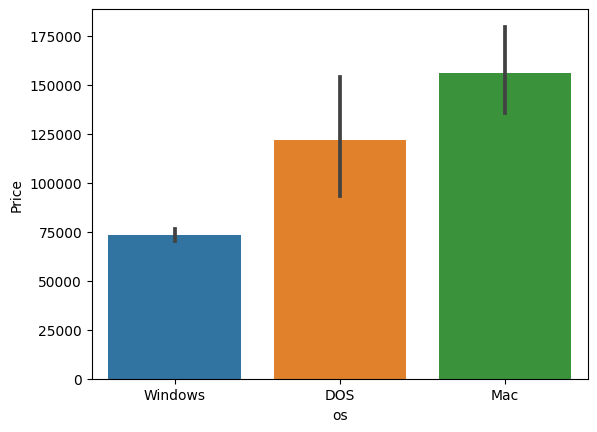

In [7]:
sns.barplot(x = df["os"] ,y =df["Price"])

<Axes: xlabel='brand'>

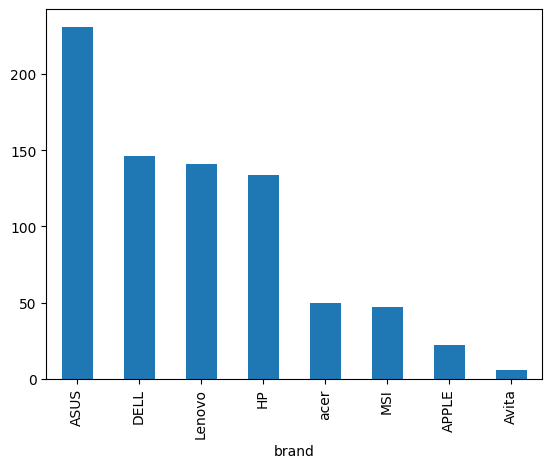

In [8]:
# Brand wise No of Laptops in Data
df["brand"].value_counts().plot(kind="bar")

<Axes: xlabel='Touchscreen', ylabel='Price'>

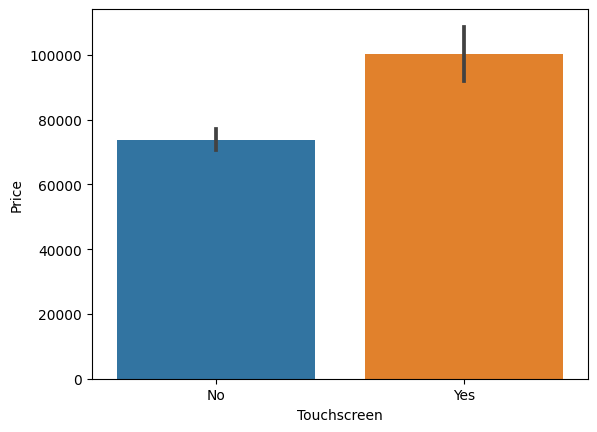

In [9]:
sns.barplot(x = df["Touchscreen"] ,y =df["Price"])

<Axes: xlabel='Touchscreen', ylabel='count'>

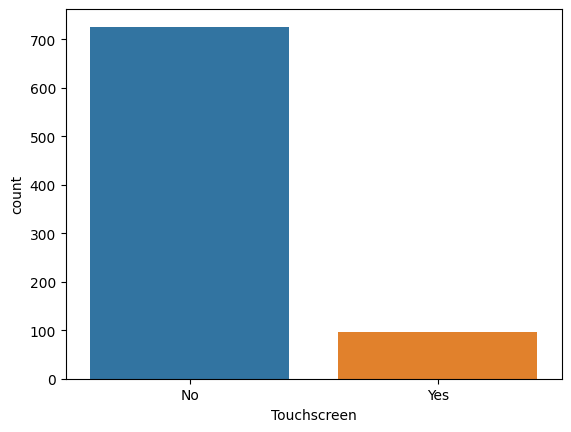

In [3]:
# Touchsreen Laptops Counts
sns.countplot(x = df["Touchscreen"])

<Axes: xlabel='Price', ylabel='Density'>

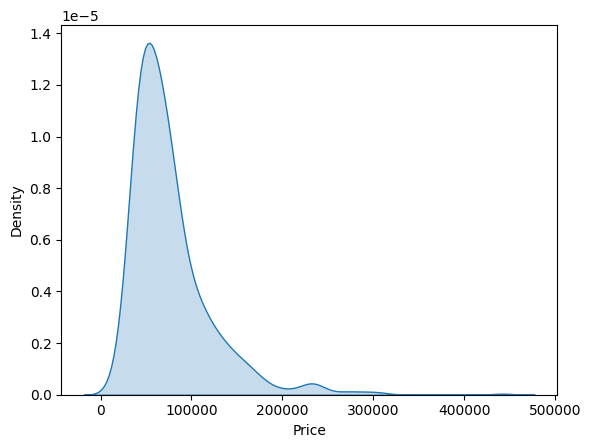

In [4]:
sns.kdeplot(df["Price"],fill=True)

<Axes: xlabel='processor_brand', ylabel='Price'>

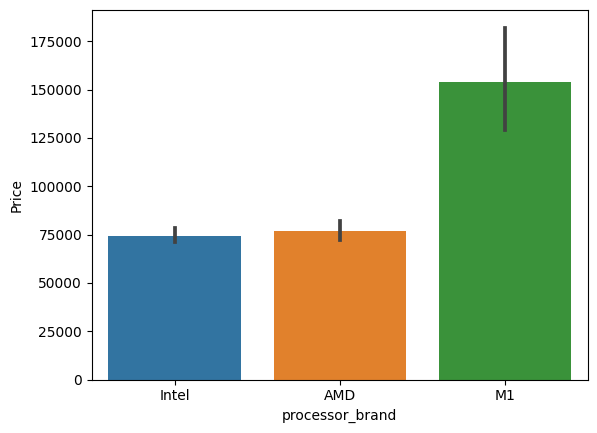

In [215]:
sns.barplot(x = df["processor_brand"] ,y =df["Price"])

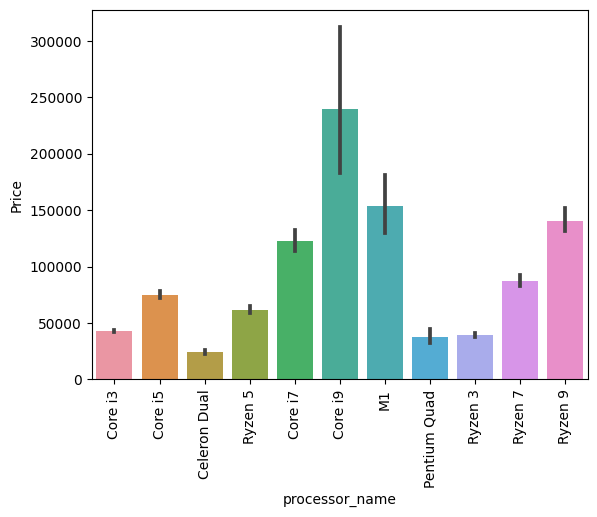

In [21]:
sns.barplot(x = df["processor_name"] ,y =df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

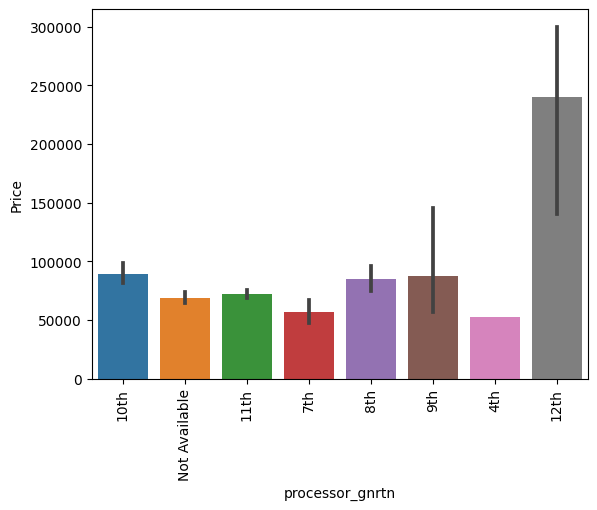

In [5]:
sns.barplot(x = df["processor_gnrtn"] ,y =df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

<Axes: xlabel='msoffice', ylabel='Price'>

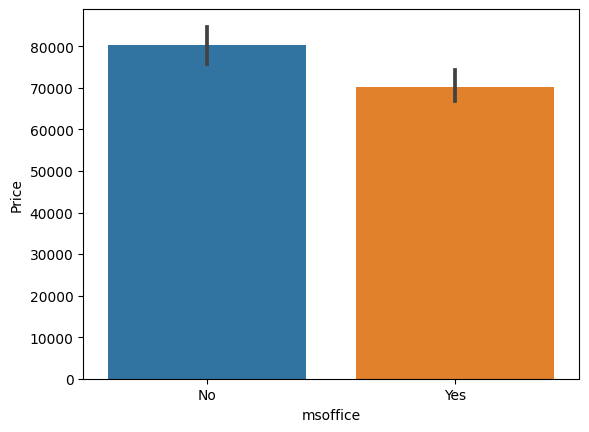

In [8]:
sns.barplot(x = df["msoffice"] ,y =df["Price"])

# 4. Feature Engineering

#### Convert Object Type  >  Numeric DataType

### 1. Label Encoding

In [22]:
df["processor_gnrtn"].value_counts()

processor_gnrtn
11th             311
Not Available    218
10th             196
8th               35
7th                7
9th                6
12th               3
4th                1
Name: count, dtype: int64

In [23]:
df["processor_gnrtn"].mode()[0]
df["processor_gnrtn"].replace({"Not Available":df["processor_gnrtn"].mode()[0]},inplace=True)
df["processor_gnrtn"].value_counts()

processor_gnrtn
11th    529
10th    196
8th      35
7th       7
9th       6
12th      3
4th       1
Name: count, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 0 to 822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            777 non-null    object
 1   processor_brand  777 non-null    object
 2   processor_name   777 non-null    object
 3   processor_gnrtn  777 non-null    object
 4   ram_gb           777 non-null    object
 5   ssd              777 non-null    object
 6   hdd              777 non-null    object
 7   os               777 non-null    object
 8   os_bit           777 non-null    object
 9   graphic_card_gb  777 non-null    object
 10  Touchscreen      777 non-null    object
 11  msoffice         777 non-null    object
 12  Price            777 non-null    int64 
dtypes: int64(1), object(12)
memory usage: 85.0+ KB


In [474]:
D = df 

# graphic_card_gb
D["graphic_card_gb"].value_counts()
D["graphic_card_gb"].replace({"0 GB":0, "4 GB":4, "2 GB":2,"6 GB":6,"8 GB":8},inplace=True)

# ram_gb
D["ram_gb"].value_counts()
D["ram_gb"].replace({"4 GB":4, "16 GB":16,"32 GB":32,"8 GB":8},inplace=True)

# hdd
D["hdd"].value_counts()
D["hdd"].replace({"0 GB":0,"1024 GB":1024,"512 GB":512,"2048 GB":2048},inplace=True)

# Touchscreen
D["Touchscreen"].value_counts()
D["Touchscreen"].replace({"Yes":1,"No":0},inplace=True)

#Processor Brand
D["processor_brand"].value_counts()
D["processor_brand"].replace({"Intel":1,"AMD":1,"M1":1.7},inplace= True)

# ssd
D["ssd"].value_counts()
D["ssd"].replace({"512 GB":512,"256 GB":256,"0 GB":0,"1024 GB":1024,"128 GB ":128,
                  "2048 GB":2048,"3072 GB":2048,"128 GB":128},inplace=True)

# Processor Name
D["processor_name"].value_counts()
D["processor_name"].replace({"Core i5":5,"Core i3":3,"Core i9":12,
                            "Ryzen 9":8,"Ryzen 3":3,"Ryzen 7":7,
                            "Core i7":7,"Ryzen 5":5,"M1":9,"Celeron Dual":2,
                            "Pentium Quad":3},inplace= True)
# OS
D["os"].replace({"Windows":1,"DOS":1,"Mac":2},inplace=True)


# OS - Bit
D["os_bit"].value_counts()
D["os_bit"].replace({"64-bit":1, "32-bit":0},inplace=True)


#msoffice
D["msoffice"].value_counts()
D["msoffice"].replace({"Yes":1,"No":0},inplace=True)



### 2. One Hot Encoding

In [475]:
D= pd.get_dummies(D,columns=["brand","processor_gnrtn"],dtype=int)

In [478]:
D.sample(5)
D.columns

Index(['processor_brand', 'processor_name', 'ram_gb', 'ssd', 'hdd', 'os',
       'os_bit', 'graphic_card_gb', 'Touchscreen', 'msoffice', 'Price',
       'brand_APPLE', 'brand_ASUS', 'brand_Avita', 'brand_DELL', 'brand_HP',
       'brand_Lenovo', 'brand_MSI', 'brand_acer', 'processor_gnrtn_10th',
       'processor_gnrtn_11th', 'processor_gnrtn_12th', 'processor_gnrtn_4th',
       'processor_gnrtn_7th', 'processor_gnrtn_8th', 'processor_gnrtn_9th'],
      dtype='object')

In [325]:
# D.skew()
# df["processor_brand"]

In [329]:
U = df["processor_brand"].quantile(0.98)
L = df["processor_brand"].quantile(0.02)
df.describe()

,processor_brand,processor_name,ram_gb,ssd,hdd,os,os_bit,graphic_card_gb,Touchscreen,msoffice,Price
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000,777.000000
mean,1.017117,5.087516,8.684685,451.212355,234.584299,1.028314,0.861004,1.238095,0.118404,0.34749,76910.471042
std,0.108185,1.807077,4.421676,313.122316,417.867331,0.165975,0.346165,2.057471,0.323294,0.47648,45585.801769
min,1.000000,2.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,16990.000000
25%,1.000000,3.000000,4.000000,256.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,45990.000000
50%,1.000000,5.000000,8.000000,512.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,64190.000000
75%,1.000000,7.000000,8.000000,512.000000,512.000000,1.000000,1.000000,2.000000,0.000000,1.00000,89990.000000
max,1.700000,12.000000,32.000000,2048.000000,2048.000000,2.000000,1.000000,8.000000,1.000000,1.00000,441990.000000


In [39]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 0 to 822
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   processor_brand       777 non-null    float64
 1   processor_name        777 non-null    int64  
 2   ram_gb                777 non-null    int64  
 3   ssd                   777 non-null    int64  
 4   hdd                   777 non-null    int64  
 5   os                    777 non-null    int64  
 6   os_bit                777 non-null    int64  
 7   graphic_card_gb       777 non-null    int64  
 8   Touchscreen           777 non-null    int64  
 9   msoffice              777 non-null    int64  
 10  Price                 777 non-null    int64  
 11  brand_APPLE           777 non-null    int32  
 12  brand_ASUS            777 non-null    int32  
 13  brand_Avita           777 non-null    int32  
 14  brand_DELL            777 non-null    int32  
 15  brand_HP              777 no

# 5. Feature Selection

### 1. Linearity

<Axes: >

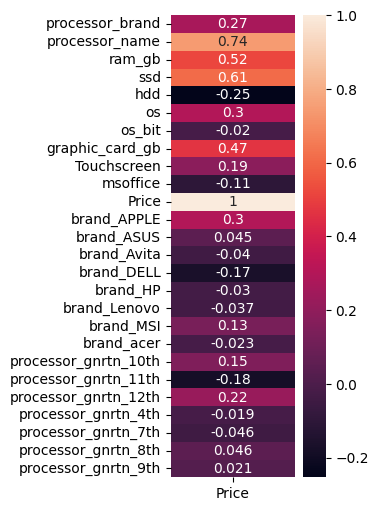

In [47]:
"Coefficient Of Correlation"

D.corr(numeric_only=True)[["Price"]]
#sns.heatmap(D.corr(),annot=True)

plt.figure(figsize = (2,6))
sns.heatmap(D.corr()[["Price"]], annot = True)

### 2. VIF ( Varience Inflution Factor)

In [48]:
x = D.drop(["Price"],axis = True)
x.shape

(777, 25)

In [473]:
vif = []

for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x,i))
    
    
"vif >> 1 to 5 "

vif  
pd.DataFrame({"Varience_IF":vif},index = x.columns)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ssd,hdd,os,os_bit,graphic_card_gb,Touchscreen,msoffice,Price
0,ASUS,1.0,3,10th,4,0,1024,1,1,0,0,0,34649
1,Lenovo,1.0,3,10th,4,0,1024,1,1,0,0,0,38999
2,Lenovo,1.0,3,10th,4,0,1024,1,1,0,0,0,39999
3,ASUS,1.0,5,10th,8,512,0,1,0,2,0,0,69990
4,ASUS,1.0,2,11th,4,0,512,1,1,0,0,0,26990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,1.0,8,11th,4,1024,0,1,1,0,0,0,135990
819,ASUS,1.0,8,11th,4,1024,0,1,1,0,0,0,144990
820,ASUS,1.0,8,11th,4,1024,0,1,1,4,0,0,149990
821,ASUS,1.0,8,11th,4,1024,0,1,1,4,0,0,142990


### Drop Columns

In [17]:
# Value of R is Low & VIF is High

D.drop(["msoffice","os_bit"],axis=1,inplace=True) 

### Final DF 

In [18]:

D = D.reset_index(drop = True)
D.shape

(777, 24)

In [472]:
D.sample(5)


,processor_brand,processor_name,ram_gb,ssd,hdd,os,os_bit,graphic_card_gb,Touchscreen,msoffice,...,brand_Lenovo,brand_MSI,brand_acer,processor_gnrtn_10th,processor_gnrtn_11th,processor_gnrtn_12th,processor_gnrtn_4th,processor_gnrtn_7th,processor_gnrtn_8th,processor_gnrtn_9th
560,1.0,7,16,1024,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
95,1.0,3,8,512,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
174,1.0,3,8,256,1024,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
738,1.0,5,4,256,1024,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
256,1.0,5,16,512,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


# 6. Model Training

## Split Data

In [233]:
" Seperate Input & Output Col"

x = D.drop(["Price"],axis=1)  # Input
y = D.loc[:,"Price"]          # Output


In [234]:
from sklearn.model_selection import train_test_split

In [235]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

### Scalling

In [239]:
sc = MinMaxScaler()
sc.fit(x)

x_train_scale = sc.transform(x_train)
x_test_scale = sc.transform(x_test)

In [445]:
x_train_scale = pd.DataFrame(x_train_scale,columns=x.columns)
x_test_scale = pd.DataFrame(x_test_scale,columns=x.columns)
x_train_scale.sample(5)

,processor_brand,processor_name,ram_gb,ssd,hdd,os,os_bit,graphic_card_gb,Touchscreen,msoffice,...,brand_Lenovo,brand_MSI,brand_acer,processor_gnrtn_10th,processor_gnrtn_11th,processor_gnrtn_12th,processor_gnrtn_4th,processor_gnrtn_7th,processor_gnrtn_8th,processor_gnrtn_9th
503,0.0,0.1,0.142857,0.125,0.5,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
515,0.0,0.1,0.000000,0.125,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
74,0.0,0.3,0.000000,0.250,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
353,0.0,0.1,0.000000,0.250,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.3,0.142857,0.250,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


80 % Data to Model | 20 % keep Aside for Testing Purpose

In [245]:
x_train.shape
y_train.shape

(621,)

In [175]:
x_test.shape
y_test.shape

(156,)

## Manual Testing

In [71]:
y_test[5:8] # Acual Laptop Price

232    73490
416    57990
366    70190
Name: Price, dtype: int64

In [70]:
y_pred[5:8].round()  # Model Predicted Price

array([86523., 59471., 73182.])

### Normality of Residual __ Assumption

In [28]:
# Error = Ya - Yp

residual = y_train - y_pred_train
residual

7     -14241.222988
726   -17027.324384
40       208.659421
140    -5937.547165
753    47573.685376
           ...     
73     14630.427270
400     2762.415475
118   -13180.147163
701   -13599.701673
206    -9459.431428
Name: Price, Length: 621, dtype: float64

### 1 QQ Plot

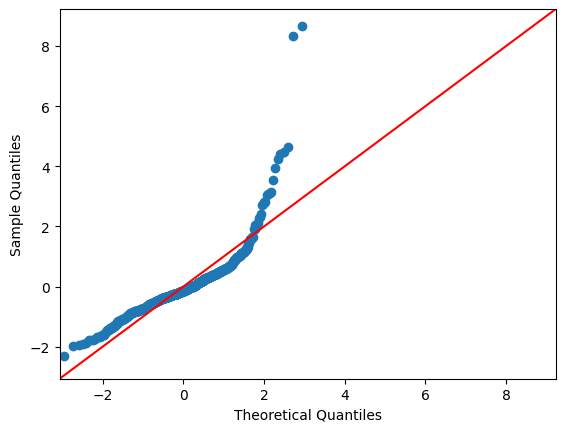

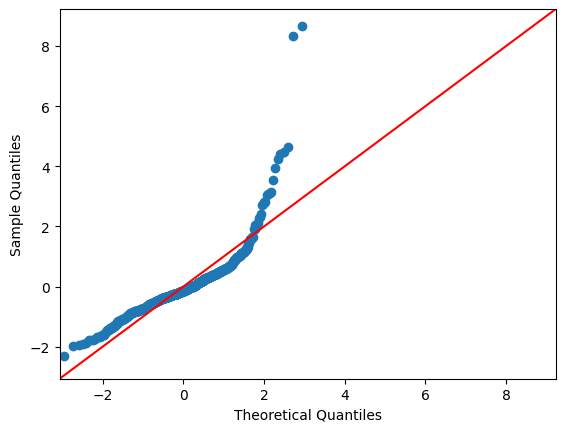

In [29]:
import statsmodels.api as sm
sm.qqplot(residual, line='45', fit = True)

### 2. Skewness

<Axes: xlabel='Price', ylabel='Density'>

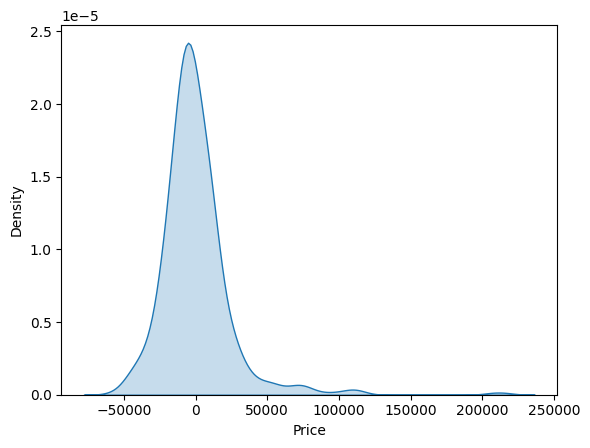

In [60]:
sns.kdeplot(residual,fill=True)

In [ ]:
Positively Skewed Data | Distribution Longer towards Right Hand Side
Mean > Median

### 3. shapiro Test

In [30]:
"P - Value"
from scipy.stats import shapiro

In [31]:
aa, P_val = shapiro(residual)
print("P Value is :", P_val)

if P_val >= 0.05:
    print("Data is normally distributed")

else:
    print("Data is not normally distributed")

P Value is : 1.9904925087269403e-27
Data is not normally distributed


### Homoscedasticity

Text(0.5, 1.0, 'Yactual Vs Residual ')

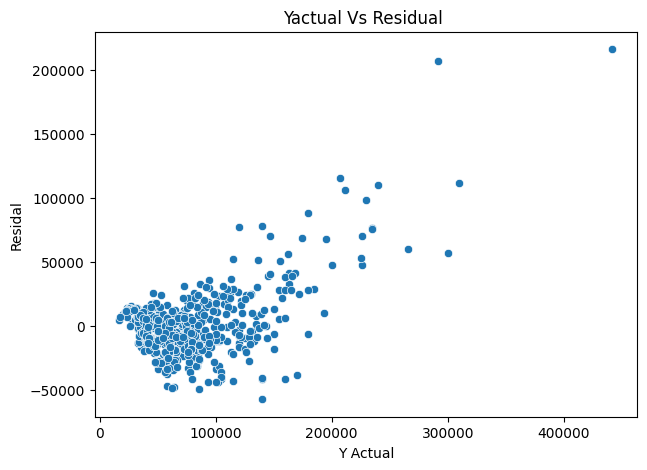

In [32]:
plt.figure(figsize = (7,5))
sns.scatterplot(x = y_train, y = residual)
plt.xlabel('Y Actual')
plt.ylabel("Residal")
plt.title("Yactual Vs Residual ")

# Spread of Residual should be Uniform

# 7. Model Evalution

In [249]:
from sklearn.metrics import r2_score ,mean_absolute_error

In [341]:
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=7,p=1)
dt = DecisionTreeRegressor(max_depth=5,max_features=0.5,random_state=5,min_impurity_decrease=0.01)
rf = RandomForestRegressor()

In [342]:
lr.fit(x_train,y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestRegressor()

### LR

In [281]:
print("Acuracy Using Linear Regression")
print()
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)


print("MAE  testing:",mean_absolute_error(y_test,y_pred).round(3))
print("MAE training :",mean_absolute_error(y_train,y_pred_train).round(3))
print("*"*45)
r2 = r2_score(y_test,y_pred)
print("R-Squared Testing :",(r2_score(y_test,y_pred)).round(3) )
print("R-Squared trainng :",r2_score(y_train,y_pred_train).round(3))

n = x_train.shape[0]
k = x_train.shape[1]

Radj = 1 - ((1 - r2) * (n-1))/(n-k-1)
print("Adjusted R-Squared Value:",(Radj*100).round(2),"%")

Acuracy Using Linear Regression

MAE  testing: 17701.556
MAE training : 15375.336
*********************************************
R-Squared Testing : 0.709
R-Squared trainng : 0.712
Adjusted R-Squared Value: 69.71 %


### with Scalling

In [353]:
print("Acuracy Using Linear Regression")
print()
lr.fit(x_train_scale,y_train)
y_pred = lr.predict(x_test_scale)
y_pred_train = lr.predict(x_train_scale)


print("MAE  testing:",mean_absolute_error(y_test,y_pred).round(3))
print("MAE training :",mean_absolute_error(y_train,y_pred_train).round(3))
print("*"*45)
r2 = r2_score(y_test,y_pred)
print("R-Squared Testing :",(r2_score(y_test,y_pred)).round(3) )
print("R-Squared trainng :",r2_score(y_train,y_pred_train).round(3))

n = x_train.shape[0]
k = x_train.shape[1]

Radj = 1 - ((1 - r2) * (n-1))/(n-k-1)
print("Adjusted R-Squared Value:",(Radj*100).round(2),"%")

Acuracy Using Linear Regression

MAE  testing: 17620.135
MAE training : 15356.646
*********************************************
R-Squared Testing : 0.707
R-Squared trainng : 0.711
Adjusted R-Squared Value: 69.44 %


### KNN

#### without Scalling

In [295]:
print("Acuracy Using KNN Regressor")
print()
y_pred = knn.predict(x_test)
y_pred_train = knn.predict(x_train)


print("MAE testing :",mean_absolute_error(y_test,y_pred).round(2))
print("MAE training :",mean_absolute_error(y_train,y_pred_train).round(2))
print("*"*45)
print("R-Squared Testing :",r2_score(y_test,y_pred).round(3))
print("R-Squared trainng :",r2_score(y_train,y_pred_train).round(4))

Acuracy Using KNN Regressor

MAE testing : 15355.22
MAE training : 12172.28
*********************************************
R-Squared Testing : 0.682
R-Squared trainng : 0.7596


#### with Scalling

In [ ]:
x_trains, x_tests, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [447]:
print("Acuracy Using Linear Regression")
print()

knns = KNeighborsRegressor(n_neighbors=5,p=1)
knns.fit(x_train_scale,y_train)
y_pred_train = knns.predict(x_train_scale)
y_pred = knns.predict(x_test_scale)

print("MAE testing :",mean_absolute_error(y_pred,y_test).round(2))
print("MAE training :",mean_absolute_error(y_train,y_pred_train).round(2))
print("*"*45)
print("R-Squared Testing :",r2_score(y_test,y_pred).round(3))
print("R-Squared trainng :",r2_score(y_train,y_pred_train).round(3))

Acuracy Using Linear Regression

MAE testing : 18602.95
MAE training : 13004.75
*********************************************
R-Squared Testing : 0.542
R-Squared trainng : 0.721


### DT

In [469]:
dt = DecisionTreeRegressor(max_depth= 9)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
y_pred_train = dt.predict(x_train)

print("*** DT Regressor ***")

print("MAE testing :",mean_absolute_error(y_test,y_pred).round(2))
print("MAE training :",mean_absolute_error(y_train,y_pred_train).round(2))
print("*"*45)

print("R-Squared Testing :",r2_score(y_test,y_pred).round(3))
print("R-Squared trainng :",r2_score(y_train,y_pred_train).round(3))

*** DT Regressor ***
MAE testing : 17938.86
MAE training : 6527.63
*********************************************
R-Squared Testing : 0.443
R-Squared trainng : 0.943


In [456]:
hyp_grid = {"max_depth":np.arange(5,50),
            "max_features":[0.4,0.6],
            "max_leaf_nodes" : np.arange(1,8)
            
           }
gscv_dt = RandomizedSearchCV(dt,hyp_grid)

In [457]:
gscv_dt.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(max_depth=45),
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'max_features': [0.4, 0.6],
                                        'max_leaf_nodes': array([1, 2, 3, 4, 5, 6, 7])})

In [458]:
gscv_dt.best_params_

{'max_leaf_nodes': 6, 'max_features': 0.4, 'max_depth': 22}

#### Hyperparameter Tunning

In [ ]:

hyp_grid = {"n_neighbors" : np.arange(2,15),"p":[1,2]}
rscv_dt = RandomizedSearchCV(dt,hyp_grid)

In [125]:

hyp_grid = {"n_neighbors" : np.arange(2,15),"p":[1,2]}
rscv_dt = RandomizedSearchCV(knn,hyp_grid)

In [127]:
rscv_dt.fit(x_train,y_train)

RandomizedSearchCV(estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'p': [1, 2]})

In [128]:
rscv_dt.best_estimator_

KNeighborsRegressor(n_neighbors=6, p=1)

In [448]:
rf = RandomForestRegressor(max_depth=43, max_features=0.65, max_samples=0.79,criterion="squared_error")
rf.fit(x_train_scale,y_train)
y_pred = rf.predict(x_test_scale)
y_pred_train = rf.predict(x_train_scale)
print()
print("*** Random Forest Regression ***")
print()
print("Accuracy on Testing  : ",r2_score(y_pred,y_test).round(4)*100)
print("Accuracy on Training : ",r2_score(y_pred_train,y_train).round(4)*100)


*** Random Forest Regression ***

Accuracy on Testing  :  58.96
Accuracy on Training :  90.64


In [415]:
rf = RandomForestRegressor(max_depth=43, max_features=0.65, max_samples=0.79,criterion="squared_error")
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_pred_train = rf.predict(x_train)
print()
print("*** Random Forest Regression ***")
print()
print("Accuracy on Testing  : ",r2_score(y_pred,y_test).round(4)*100)
print("Accuracy on Training : ",r2_score(y_pred_train,y_train).round(4)*100)


*** Random Forest Regression ***

Accuracy on Testing  :  60.5
Accuracy on Training :  90.19


In [366]:
hyp_grid = {"max_depth":np.arange(5,50),
            "n_estimators":[100],
            "max_features":[0.4,0.6],
            "max_samples":[0.5,0.75,0.9]
           }
gscv = RandomizedSearchCV(rf,hyp_grid)


In [398]:
gscv.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(max_depth=48,
                                                   max_features=0.4,
                                                   max_samples=0.75),
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'max_features': [0.4, 0.6],
                                        'max_samples': [0.5, 0.75, 0.9],
                                        'n_estimators': [100]})

In [399]:
gscv.best_estimator_

RandomForestRegressor(max_depth=43, max_features=0.4, max_samples=0.5)

### Training Data

## Training Data : 69.97%      |      Testing Data : 71.18 %

### Load Model

In [406]:
import pickle
import json

with open("model.pkl","wb") as s:
    pickle.dump(lr,s)

### Load Data

In [125]:
col = lr.feature_names_in_.tolist()
len(col)

23

In [44]:
# graphic_card_gb
graphic_card_gb_data = {"0 GB":0,"4 GB":4,"2 GB":2,"6 GB":6,"8 GB":8}

# ram_gb
ram_gb_data = {"4 GB":4,"16 GB":16,"32 GB":32,"8 GB":8}

# hdd
hdd = {"0 GB":0,"1024 GB":1024,"512 GB":512,"2048 GB":2048}

# ssd
ssd_data = {"512 GB":512,"256 GB":256,"0 GB":0,"1024 GB":1024,"128 GB ":128,
                  "2048 GB":2048,"3072 GB":2048,"128 GB":128}

# Processor Name

processor_name_data = {"Core i5":5,"Core i3":3,"Core i9":12,
                            "Ryzen 9":8,"Ryzen 3":3,"Ryzen 7":7,
                            "Core i7":7,"Ryzen 5":5,"M1":9,"Celeron Dual":2,
                            "Pentium Quad":3}

# Touchscreen
Touchscreen_data = {"Yes":1,"No":0}
os_data = {"Windows":1,"DOS":1,"Mac":2}

processor_brand = {"Intel":1,"AMD":1,"M1":1.7}

In [47]:
A = {"Touchscreen":Touchscreen_data,"os":os_data ,
     "processor_brand":processor_brand,"processor_name":processor_name_data , "col":col}

In [430]:
import json

with open("pro_data.json","w") as L:
    json.dump(A,L)

In [420]:
D.shape

(777, 24)

### User Input

In [73]:
processor_brand = "Intel"
processor_name = "Core i3"
ram_gb = 4
ssd = 0
hdd = 512
os = "Windows"
graphic_card_gb = 4 
Touchscreen = "No"
brand = "acer"
processor_gnrtn = "7th"

### utils.py

In [356]:

import warnings
warnings.filterwarnings("ignore")
import pickle
import json
import numpy as np
import pandas as pd

class Laptop_Price():
    def __init__(self,processor_brand,processor_name,ram_gb,ssd,hdd,os,graphic_card_gb,Touchscreen,brand,
                 processor_gnrtn):
               
        self.processor_brand =  processor_brand
        self.processor_name =  processor_name
        self.ram_gb = ram_gb
        self.ssd = ssd
        self.hdd = hdd 
        self.os = os
        self.graphic_card_gb = graphic_card_gb
        self.Touchscreen = Touchscreen
        self.brand = "brand_" + brand
        self.processor_gnrtn = "processor_gnrtn_" + processor_gnrtn
        
    def load_data(self):
        with open("model.pkl","rb") as r:
            self.model = pickle.load(r)
            
        with open("pro_data.json","r") as e:
            self.data = json.load(e)
            
    def lap_price(self):
        self.load_data()
               
         
        processor_gnrtn_index = self.data["col"].index(self.processor_gnrtn)
        brand_index = self.data["col"].index(self.brand)
       

        array = np.zeros([1,len(self.data["col"])])
        
        array[0][0] = self.data["processor_brand"][self.processor_brand]
        array[0][1] = self.data["processor_name"][self.processor_name]
        array[0][2] = self.ram_gb
        array[0][3] = self.ssd
        array[0][4] = self.hdd
        array[0][5] = self.data["os"][self.os]
        array[0][6] = self.graphic_card_gb
        array[0][7] = self.data["Touchscreen"][self.Touchscreen]
        
        array[0,brand_index] = 1
        array[0,processor_gnrtn_index] = 1
            
        print(array)
        price = self.model.predict(array)[0].round()
        return price
    
obj = Laptop_Price("Intel","Core i5",8,0,500,"Windows",2,"No","DELL","4th")
obj.lap_price()

[[  1.   5.   8.   0. 500.   1.   2.   0.   0.   0.   0.   1.   0.   0.
    0.   0.   0.   0.   0.   1.   0.   0.   0.]]


56022.0